In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ESN_py.ESN import ESN
from ESN_py.config import parse_args


## Load Hyper parameters

In [2]:
args = parse_args()
args

extracting arguments


Namespace(Loss_function='mse', Test=True, damping=0.3, epoch=100, input_scaling=1.25, inter_unit='tanh', l2_lambda=0.0, l_a='gd', learning_rate=0.1, n_feature=1, output_dim=1, resSize=3000, sparsity=0.01, spectral_radius=0.1, weight_scaling=1.25)

In [3]:
args.learning_rate = 1e-1
args.spectral_radius = 0.0
args.resSize = 1500
args.weight_scaling = 1.12
args.input_scaling = 1.0
args.sparsity = 0.001

## Load Dataset

In [4]:
df = np.loadtxt("MackeyGlass_t17.txt")

## Load Model(ESN-py)

In [5]:
model = ESN(args)

In [6]:
# Split train test dataset
train_X = df[:1000]
train_y = df[:1000]
test_X = df[1000:2000]
test_y = df[1000:2000]

In [7]:
model.fit(train_X,train_y,test_X,test_y)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch :0/100  Loss : 0.05113
Test Metric MSE: 0.03325   RMSE: 0.18235   MAE: 0.16111   r2score: 0.28415
epoch :1/100  Loss : 0.03366
Test Metric MSE: 0.02354   RMSE: 0.15342   MAE: 0.13486   r2score: 0.49331
epoch :2/100  Loss : 0.02389
Test Metric MSE: 0.01193   RMSE: 0.10922   MAE: 0.09692   r2score: 0.74320
epoch :3/100  Loss : 0.01210
Test Metric MSE: 0.00469   RMSE: 0.06851   MAE: 0.06120   r2score: 0.89897
epoch :4/100  Loss : 0.00469
Test Metric MSE: 0.00310   RMSE: 0.05569   MAE: 0.04365   r2score: 0.93325
epoch :5/100  Loss : 0.00297
Test Metric MSE: 0.00379   RMSE: 0.06155   MAE: 0.05324   r2score: 0.91844
epoch :6/100  Loss : 0.00361
Test Metric MSE: 0.00436   RMSE: 0.06606   MAE: 0.05710   r2score: 0.90607
epoch :7/100  Loss : 0.00420
Test Metric MSE: 0.00532   RMSE: 0.07293   MAE: 0.06383   r2score: 0.88549
epoch :8/100  Loss : 0.00520
Test Metric MSE: 0.00719   RMSE: 0.08482   MAE: 0.07274   r2score: 0.84513
epoch :9/100  Loss : 0.00712
Test Metric MSE: 0.00915   RMSE: 0.

## Visualize Metrics

Test Metric MSE: 0.00005   RMSE: 0.00678   MAE: 0.00478   r2score: 0.99903


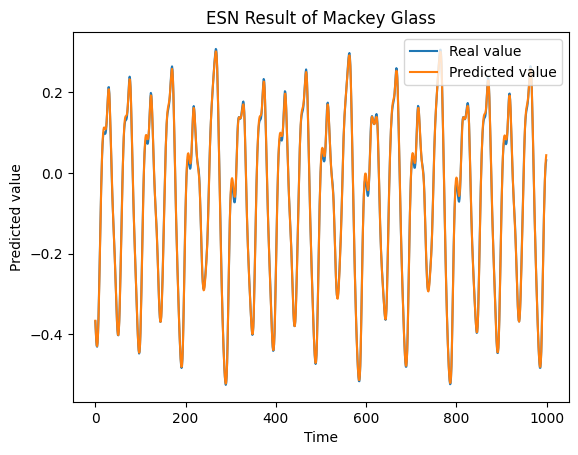

In [8]:
from ESN_py.utils.func import metric_func

plt.plot(df[2000:3000], label="Real value")  # Plot the real values
plt.plot(model.predict(df[2000:3000]).detach().cpu().numpy(), label="Predicted value")  # Plot the predicted values

# Print metrics
metric_func(df[2000:3000], model.predict(df[2000:3000]).detach().cpu().numpy())

# Plot Mackey glass
plt.title("ESN Result of Mackey Glass")
plt.xlabel("Time")
plt.ylabel("Predicted value")
plt.legend(loc='upper right')
plt.show()
